# Shaper RC-CR

## Librerie e costanti

In [2]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd
import math
# funzioni per fit
def linF(X,m,q):
    return m*X+q

In [3]:
# distribuzione uniforme
deltaTosigma= 0.58
# multimetro 
multi_C_dig = 5*deltaTosigma # errore digit capacità
multi_C_k = 0.03*deltaTosigma # errore scala capacità

multi_R_dig = 2*deltaTosigma # errore digit resistenza
multi_R_k = 0.008*deltaTosigma # errore scala resistenza

# oscilloscopio (tensioni)
osc_scala = 0.03*deltaTosigma
osc_dig = 2/256*deltaTosigma

# oscilloscopio (tempi)
# trascurabile?
osc_t_err=0.04 # errore lettura, [div]

## Misure dirette

In [4]:
# Resistenze
Rsh1=100.2 # kOhm
Rsh1_e=( (Rsh1*multi_R_k)**2 + (0.1*multi_R_dig)**2 )**0.5
Rsh2=100.1 # kOhm
Rsh2_e=( (Rsh2*multi_R_k)**2 + (0.1*multi_R_dig)**2 )**0.5

# Capacità
Csh1=0.102 # nF
Csh1_e=( (Csh1*multi_C_k)**2 + (0.001*multi_C_dig)**2 )**0.5
Csh2=0.103 # nF
Csh2_e=( (Csh2*multi_C_k)**2 + (0.001*multi_C_dig)**2 )**0.5

# tempi cratteristici previsti
taush1=Rsh1*Csh1 # us
taush1_e=( (Rsh1*Csh1_e)**2+(Csh1*Rsh1_e)**2 )**0.5
taush2=Rsh2*Csh2 # us
taush2_e=( (Rsh2*Csh2_e)**2+(Csh2*Rsh2_e)**2 )**0.5

# media pesata
taush_arr=(taush1, taush2)
taush_e_w=(1/taush1**2,1/taush2**2)
taush, taush_e=np.average(taush_arr,weights=taush_e_w, returned=True)
taush_e=taush_e**0.5
print("Rsh1",Rsh1,Rsh1_e)
print("Rsh2",Rsh2,Rsh2_e)
print("Csh1",Csh1,Csh1_e)
print("Csh2",Csh2,Csh2_e)
print("tau1",taush1,taush1_e)
print("tau2",taush2,taush2_e)
print("media pesata", taush,taush_e)

Rsh1 100.2 0.4791805976706486
Rsh2 100.1 0.47873041191885857
Csh1 0.102 0.003399987505859396
Csh2 0.103 0.0034091026443919224
tau1 10.2204 0.34416698552344605
tau2 10.310299999999998 0.34479525031417074
media pesata 10.264956352679702 0.13776970460864227


## Prime misure esplorative

Confronto il massimo sperimentale con l'aspettativa teorica

In [9]:
Vin=0.983 # Volt
Vin_scala=2
Vin_e=( (Vin*osc_scala)**2+(Vin_scala*osc_dig)**2 )**0.5

Vout_th=Vin/np.e # Volt
Vout_th_e=Vin_e/np.e

Vout_sp=0.3154 # Volt
Vout_sp_scala=0.5
Vout_sp_e=( (Vout_sp*osc_scala)**2+(Vout_sp_scala*osc_dig)**2 )**0.5

comp=abs(Vout_th-Vout_sp)/(Vout_th_e**2+Vout_sp_e**2)**0.5

tau_sp=11.7 # us
tau_sp_scala=10 # us/div
tau_sp_e=tau_sp_scala*osc_t_err
comptau=(tau_sp-taush)/(taush_e**2+tau_sp_e**2)**0.5
print("tau_sp",tau_sp,tau_sp_e)
print("Vin",Vin,Vin_e)
print("Vout th",Vout_th,Vout_th_e)
print("Vout_sp", Vout_sp,Vout_sp_e)
print("Comp",comp)
print("Comp tau",(Vout_sp-Vout_th)/Vout_th*100)

tau_sp 11.7 0.4
Vin 0.983 0.019356718830679957
Vout th 0.3616254906715278 0.007120938906343278
Vout_sp 0.3154 0.0059372351816502095
Comp 4.985825029577947
Comp tau -12.782696979045488


Confronto ora il tempo caratteristico

In [5]:
tau_sp=11.7 # us
tau_scala=10 # us/div
tau_sp_e=tau_scala*osc_t_err

comp=abs(tau_sp-taush)/(tau_sp_e**2+taush_e**2)**0.5
print(comp)
print(tau_sp_e/tau_sp*100)

3.3920501327919204
3.418803418803419


Infine, confronto i dati sperimentali con una simulazione

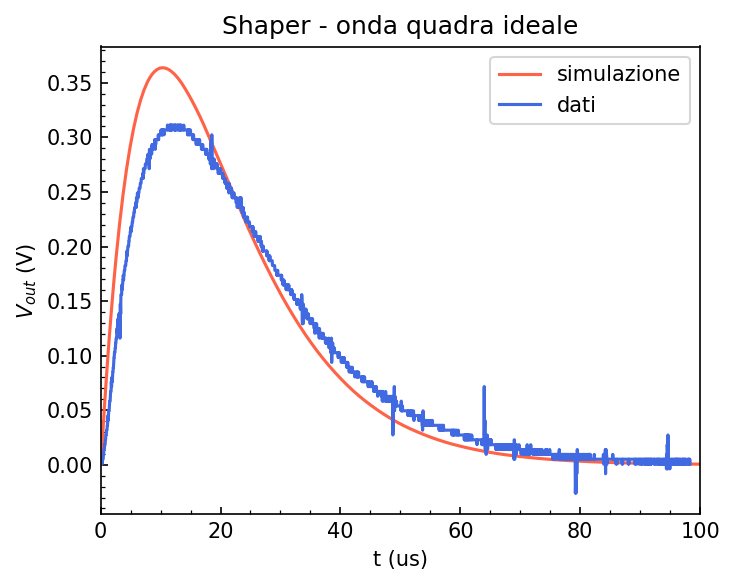

In [200]:
# importo i dati 
shaper_sim=pd.read_csv("simulazioni/shaper_sim.txt",delimiter='\t')
shaper_data=pd.read_csv("dati/shaper_data_1.txt", delimiter='\t')

# metto tutto in V e in us
shaper_data['vout']=shaper_data['vout']*1e-3
shaper_data['t']=shaper_data['t']

# creo plot
fig=plt.figure(figsize=(5,4))
fig.set_dpi(150)

# plot simulazione
Xsim=shaper_sim['time']*1e6
Ysim=shaper_sim['vout']
plt.plot(Xsim,Ysim,color='tomato')

# plot dati 
X=shaper_data['t']
Y=shaper_data['vout']
plt.plot(X,Y,color='royalblue')

# plot customization
plt.xlabel("t (us)")
plt.ylabel("$V_{out}$ (V)")
plt.xlim(0,100)
plt.tick_params(axis='both', which='minor', direction='in')
plt.tick_params(axis='both', which='major', direction='in')
plt.minorticks_on()
plt.legend(labels=("simulazione","dati"))
plt.title("Shaper - onda quadra ideale")

fig.tight_layout()
fig.savefig("../../latex/shaper/images/grafico_esp.png")


## Risposta in frequenza 

Importo i dati per fare il grafico di Bode

,f,Vin,Vin_scala,Vout,Vout_scala,Vin_e,Vout_e,Hdb,Hdb_e
0,100,0.9684,2,0.00885,0.5,0.009062,0.002266,-40.782230,2.225097
1,165,0.9684,2,0.00948,0.5,0.009062,0.002266,-40.184929,2.077431
2,270,0.9684,2,0.01833,0.5,0.009062,0.002266,-34.457846,1.076666
3,440,0.9684,2,0.03224,0.5,0.009062,0.002266,-29.553195,0.615778
4,720,0.9684,2,0.04614,0.5,0.009062,0.002266,-26.439544,0.434182
5,1180,0.9684,2,0.07269,0.5,0.009062,0.002266,-22.491602,0.282664
6,1930,0.9684,2,0.11820,0.5,0.009062,0.002266,-18.268746,0.185272
7,3160,0.9684,2,0.18390,0.5,0.009062,0.002266,-14.429461,0.134380
8,5180,0.9684,2,0.28130,0.5,0.009062,0.002266,-10.737701,0.107244
9,8480,0.9836,2,0.37360,0.5,0.009062,0.002266,-8.408233,0.095807


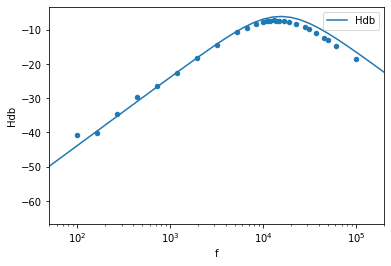

In [192]:
# importo simulazione LTspice
#bode_sim=pd.read_csv("simulazioni/shaper_bode.txt", delimiter="\t")
bode_sim=pd.read_csv("simulazioni/shaper_bodeL.txt", delimiter="\t")

# importo dati sperimentali e calcolo errori vin e vout
bode_data=pd.read_csv("dati/shaper_bode.txt", delimiter="\t")
bode_data['Vin_e']=osc_dig*bode_data['Vin_scala']
bode_data['Vout_e']=osc_dig*bode_data['Vout_scala']

bode_data['Hdb']=20*np.log10(bode_data['Vout']/bode_data['Vin'])
bode_data['Hdb_e']=20*( (bode_data['Vout_e']/bode_data['Vout'])**2+
                        (bode_data['Vin_e']/bode_data['Vin'])**2)**0.5*np.log10(math.e)

ax=bode_sim.plot(x='f',y='Hdb',logx=True)
bode_data.plot(x='f',y='Hdb', ax=ax, kind='scatter',xlim=(50,20e4))

bode_data

Stimo la frequenza di taglio dal grafico di bode, trovando il punto di intersezione tra i due fit.
Inizio con il selzionare i dati per i due fit:

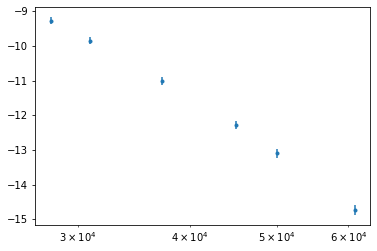

In [193]:
# dati a sx
inf1=0
sup1=5e3
X1=bode_data['f'][bode_data['f']<sup1][bode_data['f']>inf1]
Y1=bode_data['Hdb'][bode_data['f']<sup1][bode_data['f']>inf1]
Y1_e=bode_data['Hdb_e'][bode_data['f']<sup1][bode_data['f']>inf1]


# dati a dx
inf2=2.5e4
sup2=1e5
X2=bode_data['f'][bode_data['f']<sup2][bode_data['f']>inf2]
Y2=bode_data['Hdb'][bode_data['f']<sup2][bode_data['f']>inf2]
Y2_e=bode_data['Hdb_e'][bode_data['f']<sup2][bode_data['f']>inf2]

plt.errorbar(X2,Y2, Y2_e,fmt='.')
plt.xscale('log')

Faccio i fit e riporto tutto in un grafico 

3.4850291175925987 6.602621391839806
1.0626592541148288 0.12781124269083818
-0.5317130540922116 -0.7569659468258781


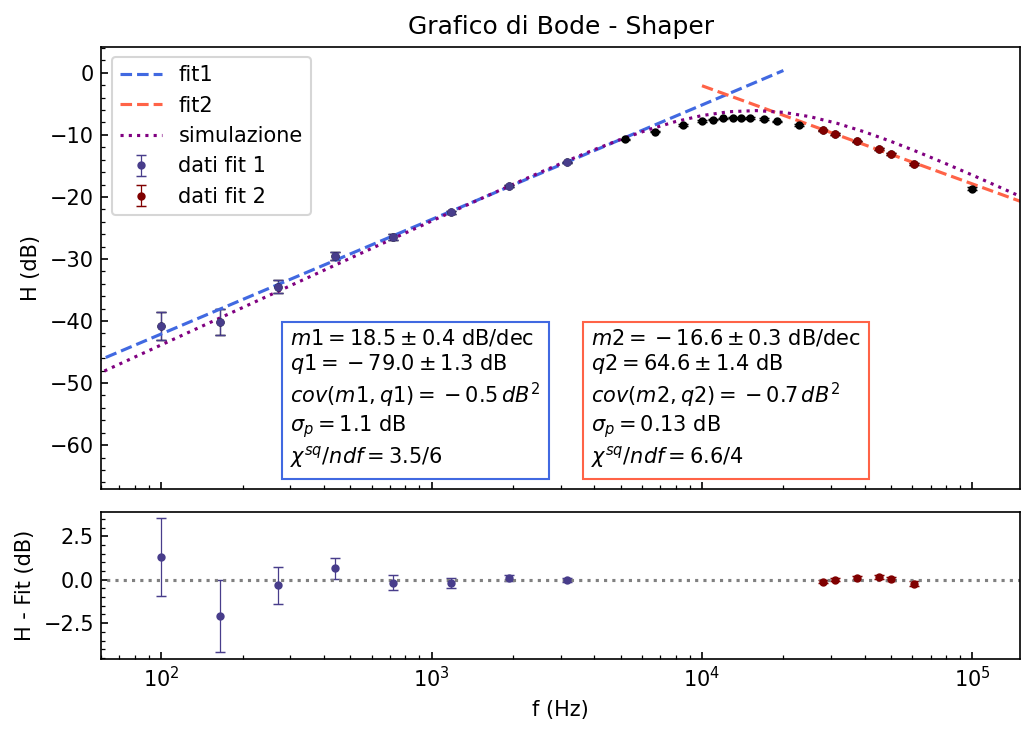

In [195]:
# fit
par1,cov1=curve_fit(linF,np.log10(X1),Y1, sigma=Y1_e, absolute_sigma=True)
par2,cov2=curve_fit(linF,np.log10(X2),Y2, sigma=Y2_e, absolute_sigma=True)

# plot fit+dati
fig,axes=plt.subplots(nrows=2, figsize=(7,5),gridspec_kw=dict(height_ratios=[3,1]),sharex=True)
fig.set_dpi(150)

axes[0].errorbar(bode_data['f'],bode_data['Hdb'],bode_data['Hdb_e'], fmt='.',color='black', capsize=2.5,
                 capthick=0.7, elinewidth=0.6)
axes[0].errorbar(X1,Y1,Y1_e, fmt='.',color='darkslateblue', capsize=2.5,
                 capthick=0.7, elinewidth=0.6,label='dati fit 1')
axes[0].errorbar(X2,Y2,Y2_e, fmt='.',color='maroon', capsize=2.5,
                 capthick=0.7, elinewidth=0.6,label='dati fit 2')
axes[0].plot(np.linspace(10,2e4),linF(np.log10(np.linspace(10,2e4)),*par1),'--', color='royalblue',label='fit1')
axes[0].plot(np.linspace(1e4,1e6),linF(np.log10(np.linspace(1e4,1e6)),*par2),'--',color='tomato',label='fit2')
axes[0].semilogx(True)

# plot simulazione
axes[0].plot(bode_sim['f'],bode_sim['Hdb'],':',color='purple',label='simulazione')

# plot residui
diff1=Y1-linF(np.log10(X1),*par1)
diff2=Y2-linF(np.log10(X2),*par2)
axes[1].errorbar(X1,diff1,Y1_e,fmt='.',color='darkslateblue', capsize=2.5,
                 capthick=0.7, elinewidth=0.6)
axes[1].errorbar(X2,diff2,Y2_e,fmt='.',color='maroon', capsize=2.5,
                 capthick=0.7, elinewidth=0.6)
axes[1].plot(np.logspace(0,6),np.linspace(0,0),':',color='gray')

# chisq e sigma post
sigmap1 = (np.sum(diff1**2)/(len(diff1)-2))**0.5
chisq1 = np.sum(diff1**2/Y1_e**2)
sigmap2 = (np.sum(diff2**2)/(len(diff1)-2))**0.5
chisq2 = np.sum(diff2**2/Y2_e**2)


# plot customiz
axes[0].set_xlim(60,1.5e5)
axes[1].semilogx(True)
for i in axes:
    i.tick_params(axis='both', which='minor', direction='in')
    i.tick_params(axis='both', which='major', direction='in')
    i.minorticks_on()
axes[1].set_xlabel("f (Hz)")
axes[1].set_ylabel("H - Fit (dB)")
axes[0].set_ylabel("H (dB)")
axes[0].set_title("Grafico di Bode - Shaper")
axes[0].legend()
# box
axes[0].text(300,-63, '$m1=18.5\pm 0.4$ dB/dec'
                               '\n$q1=-79.0 \pm 1.3$ dB'
                               '\n$cov(m1,q1)=-0.5\,dB^2$'
                                '\n$\sigma_p=1.1$ dB'
                                '\n$\chi^{sq}/ndf=3.5/6$', color='black', 
       bbox=dict(facecolor='none', edgecolor='royalblue', pad=4))

axes[0].text(3900,-63, '$m2=-16.6\pm 0.3$ dB/dec'
                               '\n$q2=64.6 \pm 1.4$ dB'
                               '\n$cov(m2,q2)=-0.7\,dB^2$'
                                '\n$\sigma_p=0.13$ dB'
                                '\n$\chi^{sq}/ndf=6.6/4$', color='black', 
       bbox=dict(facecolor='none', edgecolor='tomato', pad=4))


fig.tight_layout()
fig.savefig("../../latex/shaper/images/fit_bode.png", dpi=150)
print(chisq1,chisq2)
print(sigmap1,sigmap2)
print(cov1[1][0],cov2[1][0])

In [214]:
m1=par1[0]
m1_e=cov1[0][0]**0.5
q1=par1[1]
q1_e=cov1[1][1]**0.5
m2=par2[0]
m2_e=cov2[0][0]**0.5
q2=par2[1]
q2_e=cov2[1][1]**0.5
covmq1=cov1[0][1]
covmq2=cov2[1][0]


ft_fit=(q1-q2)/(m2-m1)
ft_fit_e=ft_fit*( (q1_e**2+q2_e**2)/(q1-q2)**2 +
                  (m1_e**2+m2_e**2)/(m1-m2)**2 +
                  2*(covmq1+covmq2)/((q1-q2)*(m2-m1)) )**0.5
ft_fit_lin=10**ft_fit
ft_fit_lin_e=ft_fit_lin*np.log(10)*ft_fit_e


ft_th=1/(2*math.pi*taush)*1e6
ft_th_e=1/(2*math.pi)*taush_e/(taush**2)*1e6
ft_sp=1/(2*math.pi*tau_sp)*1e6
ft_sp_e=1/(2*math.pi)*tau_sp_e/(tau_sp**2)*1e6

#print("ft",10**ft_fit,ft_th,ft_sp)
print("ft",ft_fit_lin,ft_fit_lin_e)
print("ft th", ft_th, ft_th_e)
print("ft sp", ft_sp, ft_sp_e)
print("comp ft_th", (ft_fit_lin - ft_th)/(ft_fit_lin_e**2 + ft_th_e**2)**0.5 )
print("comp ft_sp", (ft_fit_lin - ft_sp)/(ft_fit_lin_e**2 + ft_sp_e**2)**0.5 )
print("m1,q1,m2,q2",m1,q1,m2,q2)
print("err m1,q1,m2,q2",m1_e,q1_e,m2_e,q2_e)

ft 12314.00136816802 316.1296310779231
ft th 15504.687757425037 208.09404141616733
ft sp 13602.986589050885 465.0593705658422
comp ft_th -8.430441824959171
comp ft_sp -2.2922106870122447
m1,q1,m2,q2 18.453967005338573 -78.99709917845603 -15.819807853488543 61.19632199967712
err m1,q1,m2,q2 0.40001485640752477 1.3327684118760985 0.4063598323395246 1.8633668509763324


## Undershoot

Carico i dati dell'oscilloscopio che mostrano l'undershoot

In [19]:
under_data=pd.read_csv('dati/undershoot.txt',delimiter='\t') 
# tempi us \t channel A V \t channel B mV
# converto Vin in mV
under_data['vin']=under_data['vin']*1e3

under_data_sim=pd.read_csv('simulazioni/undershootT4.txt',delimiter='\t') 
under_data_sim['V(vout)']=under_data_sim['V(vout)']*1e3
under_data_sim['time']=under_data_sim['time']*1e6-4
under_data_sim

,time,V(vout)
0,-4.000000,0.000000
1,-3.976130,-0.000226
2,-3.952261,0.000042
3,-3.928391,0.000802
4,-3.904522,0.002056
...,...,...
137,105.755859,-10.853800
138,110.033203,-10.557570
139,131.361328,-9.242022
140,135.873047,-8.978779


Mostro la presenza del fenomeno di undershoot

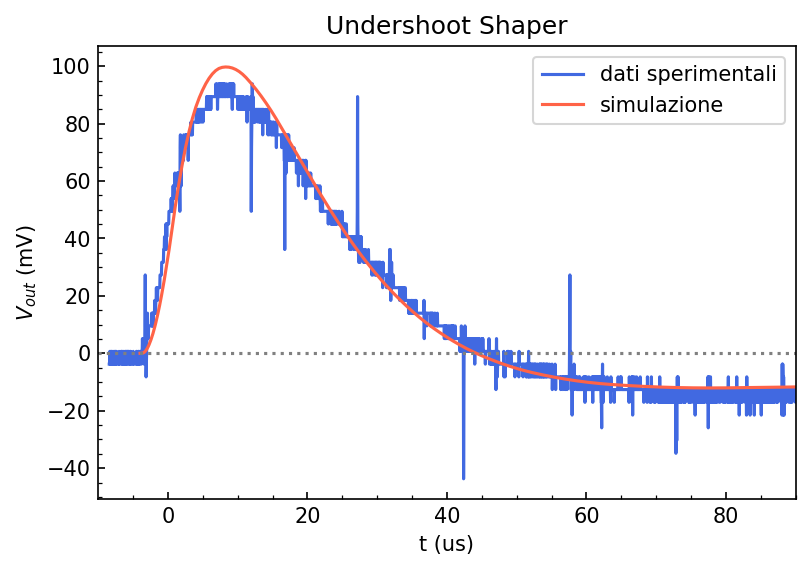

In [56]:
X=under_data['t']
Y=under_data['vout']

fig=plt.figure()
fig.set_dpi(150)
plt.plot(X,Y, '-',color='royalblue')
plt.plot(under_data_sim['time'],under_data_sim['V(vout)'],color='tomato')
plt.plot(np.linspace(-10,90), np.linspace(0,0),':',color='gray')
plt.xlim(-10,90)
plt.xlabel("t (us)")
plt.ylabel("$V_{out}$ (mV)")

plt.title("Undershoot Shaper")
plt.legend(labels=('dati sperimentali','simulazione'))

plt.tick_params(axis='both', which='minor', direction='in')
plt.tick_params(axis='both', which='major', direction='in')
plt.minorticks_on()


In [106]:
vmax_under= 0.1068 # [V], no errori perchè interferenze
vmax_under_scala= 0.5
vmax_under_e= ((vmax_under*osc_scala)**2+(vmax_under_scala*osc_dig)**2)**0.5
tmax_under= 0.00001295 # [s]
print("undershoot",vmax_under,vmax_under_e,vmax_under_e/vmax_under)

undershoot 0.1068 0.0029302576444785533 0.02743686933032353


Calcolo il valore Rpz della resistenza di pole zero richiesto per eliminare l'effetto di Pole Zero

In [114]:
tau_preamp=0.154224 
tau_preamp_e=0.0036552916369064405
Rpz_th= tau_preamp/Csh1*1000 # kOhm
Rpz_th_e=Rpz_th*( (tau_preamp_e/tau_preamp)**2+(Csh1_e/Csh1)**2 )**0.5 # kOhm
print(Rpz_th,Rpz_th_e)

1512.0 61.84152347233271


Con le resistenze a disposizione si è scelta Rpz data dalla serie di Rpz1,Rpz2

In [115]:
Rpz1=558 # kOhm
Rpz1_e=((Rpz1*multi_R_k)**2+(multi_R_dig*1)**2)**0.5
Rpz2=1009 #oOhm
Rpz_sp=Rpz1+Rpz2
Rpz2_e=((Rpz2*multi_R_k)**2+(multi_R_dig*1)**2)**0.5
Rpz_sp
Rpz_sp_e=(Rpz2_e**2+Rpz1_e**2)**0.5
Rpz_sp,Rpz_sp_e,Rpz_sp_e/Rpz_sp*100


(1567, 5.595857313406053, 0.35710640162131796)

Controllo compatibilità col valore teorico della resistenza Rpz

In [116]:
abs((Rpz_th-Rpz_sp))/(Rpz_th_e**2+Rpz_sp_e**2)**0.5

0.8857512371980608

Importo i nuovi dati per mostrare che non c'è più undershoot

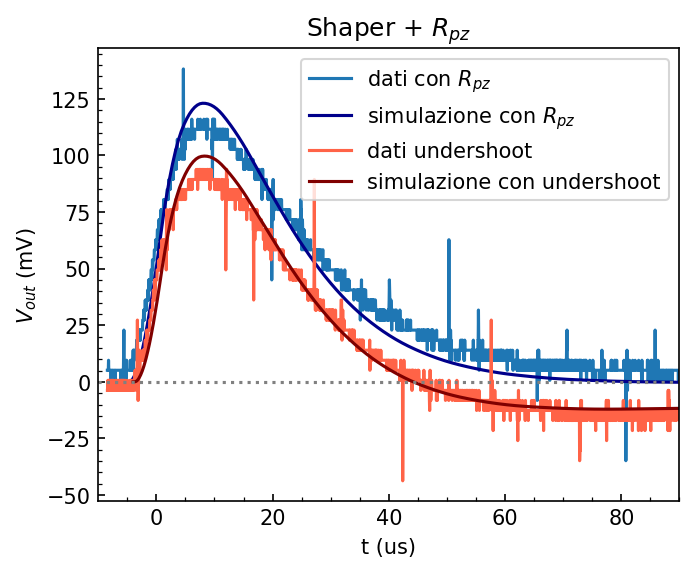

In [202]:
fig=plt.figure(figsize=(5,4))
fig.set_dpi(150)

rpz_data=pd.read_csv('dati/pole_zero.txt',delimiter='\t') 
# tempi us \t channel A V \t channel B mV
# converto Vin in mV
rpz_data['vin']=rpz_data['vin']*1e3


rpz_data_sim=pd.read_csv('simulazioni/overshootT5.txt',delimiter='\t') 
rpz_data_sim['V(vout)']=rpz_data_sim['V(vout)']*1e3
rpz_data_sim['time']=rpz_data_sim['time']*1e6 - 5

rpz_data_sim1=pd.read_csv('simulazioni/overshootT5.txt',delimiter='\t') 
rpz_data_sim1['V(vout)']=rpz_data_sim1['V(vout)']*1e3
rpz_data_sim1['time']=rpz_data_sim1['time']*1e6 - 5



X=rpz_data['t']
Y=rpz_data['vout']
ax=plt.plot(X,Y)

# plt.plot(rpz_data_sim['time'],rpz_data_sim['V(vout)'],color='tomato')
plt.plot(rpz_data_sim1['time'],rpz_data_sim1['V(vout)'],color='darkblue')


plt.xlim(-10,90)
plt.xlabel("t (us)")
plt.ylabel("$V_{out}$ (mV)")

plt.title("Shaper + $R_{pz}$")


plt.tick_params(axis='both', which='minor', direction='in')
plt.tick_params(axis='both', which='major', direction='in')
plt.minorticks_on()

X=under_data['t']
Y=under_data['vout']
plt.plot(X,Y, '-',color='tomato')
plt.plot(under_data_sim['time'],under_data_sim['V(vout)'],color='maroon')


plt.legend(labels=('dati con $R_{pz}$',
                   'simulazione con $R_{pz}$', 'dati undershoot',
                   'simulazione con undershoot'))


plt.plot(np.linspace(-10,90), np.linspace(0,0),':',color='gray')
fig.savefig("../../latex/shaper/images/undershoot.png", dpi=150)